/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

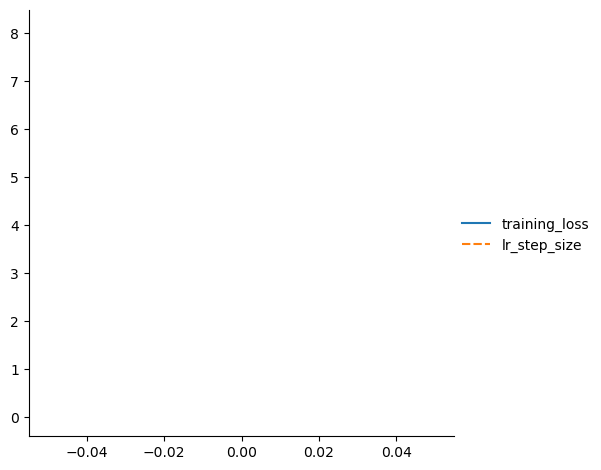

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/IDUNfiles/models/model2/metrics.csv"

df = pd.read_csv(path)

training_loss = df['training_loss']
validation_loss = df['validation_losses']

sns.relplot(df, kind='line')


# Visualize fish individuals for annotation assistance

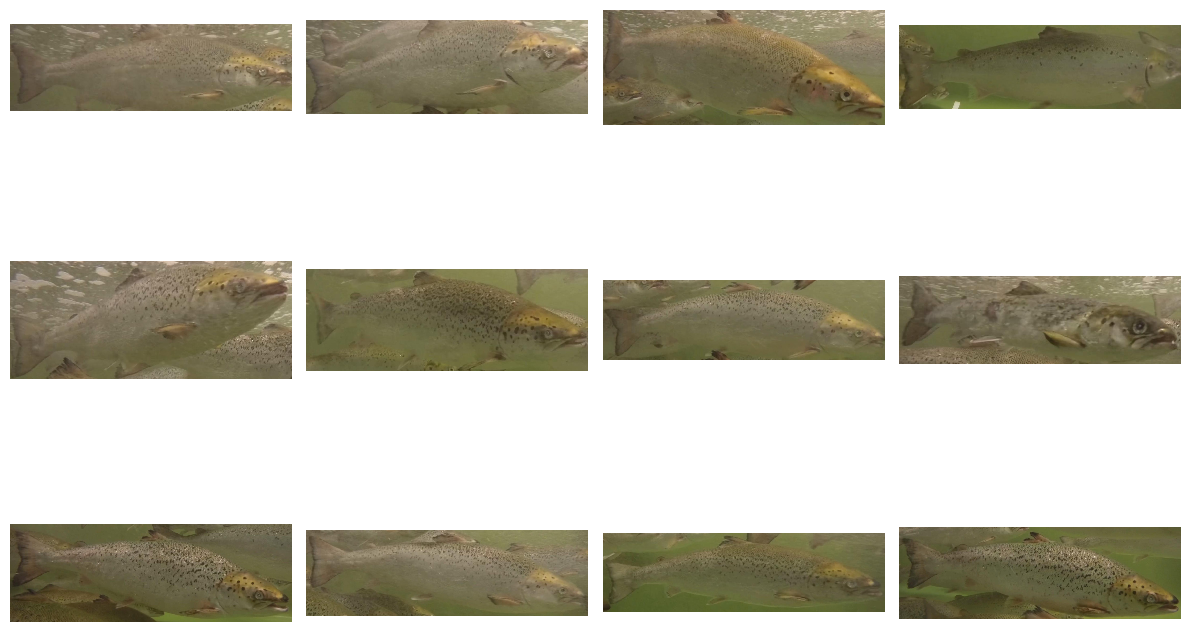

In [5]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path to the folder containing the images
folder_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Landmark_Deteksjonssett/"

fish2 = folder_path + "fish2/fish2_00000294.jpg"
fish3 = folder_path + "fish3/fish3_00000549.jpg"
fish5 = folder_path + "fish5/fish5_00008309.jpg"
fish6 = folder_path + "fish6/fish6_00003589.jpg"
fish7 = folder_path + "fish7/fish7_00010984.jpg"
fish9 = folder_path + "fish9/fish9_00005879.jpg"
fish10 = folder_path + "fish10/fish10_00009069.jpg"
fish11 = folder_path + "fish11/fish11_00010684.jpg"
fish12 = folder_path + "fish12/fish12_00011819.jpg"
fish13 = folder_path + "fish13/fish13_00021229.jpg"
fish14 = folder_path + "fish14/fish14_00022919.jpg"
fish15 = folder_path + "fish15/fish15_00024439.jpg"


# Get the list of image files
image_files = [fish2, fish3, fish5, fish6, fish7, fish9, fish10, fish11, fish12, fish13, fish14, fish15]

# Calculate the number of rows and columns needed for the grid
num_images = len(image_files)
num_rows = (num_images + 3) // 4  # Round up to the nearest integer
num_cols = min(num_images, 4)

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

# Loop through the image files and plot them in the grid
for idx, ax in enumerate(axes.flat):
    if idx < num_images:
        # Load the image
        image_path = os.path.join(folder_path, image_files[idx])
        image = Image.open(image_path)

        # Plot the image
        ax.imshow(image, interpolation='nearest')  # Use nearest neighbor interpolation
        ax.axis('off')
    else:
        # If there are fewer images than subplots, remove the empty subplot
        fig.delaxes(ax)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Experimentation with os code

In [16]:
import os

data_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Landmark_Deteksjonssett/"

images = []
annots = []
for folder in os.listdir(data_path):
    if (not folder.startswith('.')) and os.path.isdir(os.path.join(data_path, folder)):
        for file in sorted(os.listdir(os.path.join(data_path, folder))):
            if file.endswith('.json'):
                annots.append(file)
            elif file.endswith(('.jpg', '.jpeg', '.png')):
                images.append(file)
                
idx = 1

img_path = os.path.join(data_path, images[idx][:images[idx].find("_",0, 7)], images[idx])
img_path

'/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Landmark_Deteksjonssett/fish2/fish2_GP020101_00000299.jpg'

# Keypoint RCNN experimentation

In [17]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights

model = keypointrcnn_resnet50_fpn(pretrained=True)

model

/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /Users/magnuswiik/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth
100%|██████████| 226M/226M [00:36<00:00, 6.54MB/s] 


KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.